<h6 style="font-size: x-large">DATA SCIENCE INTERN @BHARAT INTERN</h6>

<p style = "font-size: 25px font-weight: bold">TASK 1 : STOCK PREDICTION </p>

<p style = "font-size: 25px font-weight: bold">AIM : TO PREDICT THE STOCK PRICE OF NETFILX COMPANY  </p>

In [63]:
!pip install scikit-learn

In [64]:
!pip install pandas

In [65]:
!pip install seaborn

<p style = "font-size: 25px font-weight: bold">IMPORTING DEPENDENCIES</p>

In [66]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
warnings.filterwarnings('ignore')


In [67]:
df = pd.read_csv('NFLX.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


<p><span style="font-size: 20px; color: white; font-weight: bold;">DATA UNDERSTANDING</span></p>

In [68]:
print("shape of data:" ,df.shape)

shape of data: (1009, 7)


In [69]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [71]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [72]:
df = df[['Date','Open','Close']] # Extracting required columns
df['Date'] = pd.to_datetime(df['Date']).dt.date
df.set_index('Date', inplace=True)
df.head(10)

,Open,Close
Date,,
2018-02-05,262.000000,254.259995
2018-02-06,247.699997,265.720001
2018-02-07,266.579987,264.559998
2018-02-08,267.079987,250.100006
2018-02-09,253.850006,249.470001
2018-02-12,252.139999,257.950012
2018-02-13,257.290009,258.269989
2018-02-14,260.470001,266.000000
2018-02-15,270.029999,280.269989


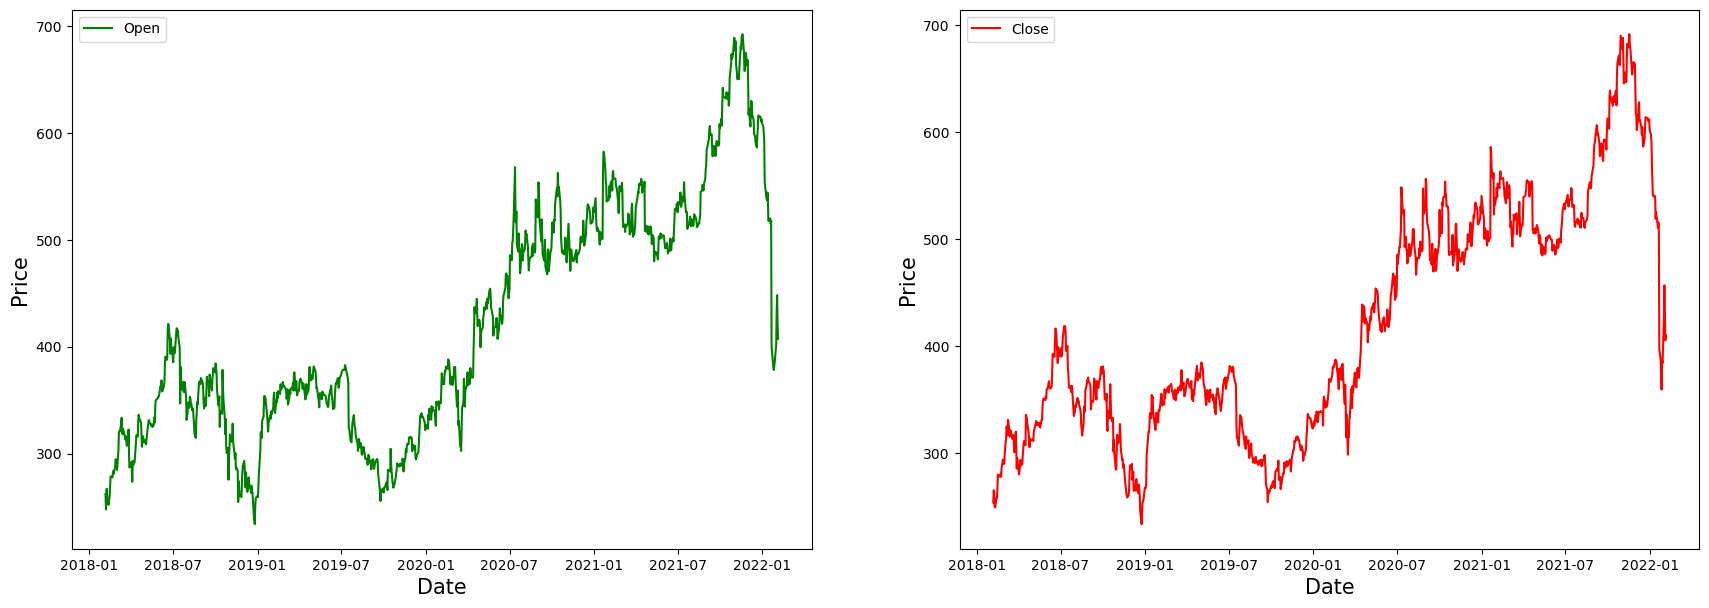

In [73]:
# plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(21,7))
ax[0].plot(df['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

<p><span style="font-size: 20px; color: white; font-weight: bold;">DATA PROCESSING</span></p>

In [74]:
mm = MinMaxScaler()
df[df.columns] = mm.fit_transform(df)
df.head(10)

,Open,Close
Date,,
2018-02-05,0.061253,0.044516
2018-02-06,0.030059,0.069548
2018-02-07,0.071243,0.067015
2018-02-08,0.072334,0.035430
2018-02-09,0.043474,0.034053
2018-02-12,0.039744,0.052576
2018-02-13,0.050978,0.053275
2018-02-14,0.057915,0.070160
2018-02-15,0.078769,0.101330


In [75]:
train_size = round(len(df) * 0.65)
train_size

656

In [76]:
train_data = df[:train_size]
test_data = df[train_size:]
train_data.shape, test_data.shape

((656, 2), (353, 2))

In [77]:
from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))




In [78]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((606, 50, 2), (606, 2), (303, 50, 2), (303, 2))

<p><span style="font-size: 20px; color: white; font-weight: bold;">LSTM MODELLING</span></p>

In [79]:
#  from keras.models Sequential is imported
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50, 50)            10600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [80]:
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Train on 606 samples, validate on 303 samples
Epoch 1/100
606/606 [==============================] - 1s 2ms/step - loss: 0.0178 - mean_absolute_error: 0.0971 - val_loss: 0.0367 - val_mean_absolute_error: 0.1780
Epoch 2/100
606/606 [==============================] - 1s 1ms/step - loss: 0.0036 - mean_absolute_error: 0.0462 - val_loss: 0.0077 - val_mean_absolute_error: 0.0688
Epoch 3/100
606/606 [==============================] - 1s 1ms/step - loss: 0.0023 - mean_absolute_error: 0.0368 - val_loss: 0.0057 - val_mean_absolute_error: 0.0512
Epoch 4/100
606/606 [==============================] - 1s 1ms/step - loss: 0.0021 - mean_absolute_error: 0.0347 - val_loss: 0.0075 - val_mean_absolute_error: 0.0615
Epoch 5/100
606/606 [==============================] - 1s 2ms/step - loss: 0.0020 - mean_absolute_error: 0.0341 - val_loss: 0.0055 - val_mean_absolute_error: 0.0503
Epoch 6/100
606/606 [==============================] - 1s 1ms/step - loss: 0.0019 - mean_absolute_error: 0.0333 - val_loss: 0.004

Epoch 50/100
606/606 [==============================] - 1s 2ms/step - loss: 7.9277e-04 - mean_absolute_error: 0.0208 - val_loss: 0.0013 - val_mean_absolute_error: 0.0245
Epoch 51/100
606/606 [==============================] - 1s 2ms/step - loss: 7.4408e-04 - mean_absolute_error: 0.0201 - val_loss: 0.0012 - val_mean_absolute_error: 0.0232
Epoch 52/100
606/606 [==============================] - 1s 2ms/step - loss: 7.0701e-04 - mean_absolute_error: 0.0195 - val_loss: 0.0012 - val_mean_absolute_error: 0.0218
Epoch 53/100
606/606 [==============================] - 1s 2ms/step - loss: 7.0588e-04 - mean_absolute_error: 0.0198 - val_loss: 0.0012 - val_mean_absolute_error: 0.0223
Epoch 54/100
606/606 [==============================] - 1s 2ms/step - loss: 7.2688e-04 - mean_absolute_error: 0.0197 - val_loss: 0.0012 - val_mean_absolute_error: 0.0215
Epoch 55/100
606/606 [==============================] - 1s 2ms/step - loss: 7.2027e-04 - mean_absolute_error: 0.0196 - val_loss: 0.0013 - val_mean_abs

606/606 [==============================] - 1s 2ms/step - loss: 4.4068e-04 - mean_absolute_error: 0.0152 - val_loss: 7.6330e-04 - val_mean_absolute_error: 0.0173
Epoch 98/100
606/606 [==============================] - 1s 1ms/step - loss: 4.2964e-04 - mean_absolute_error: 0.0147 - val_loss: 7.5290e-04 - val_mean_absolute_error: 0.0172
Epoch 99/100
606/606 [==============================] - 1s 2ms/step - loss: 4.4844e-04 - mean_absolute_error: 0.0151 - val_loss: 0.0016 - val_mean_absolute_error: 0.0337
Epoch 100/100
606/606 [==============================] - 1s 2ms/step - loss: 5.8745e-04 - mean_absolute_error: 0.0181 - val_loss: 0.0011 - val_mean_absolute_error: 0.0251


In [81]:
#Running the model and predicting the data
test_predicted = model.predict(test_seq)
test_predicted[:5]

array([[0.53484577, 0.5542453 ],
       [0.5143461 , 0.5376739 ],
       [0.5171881 , 0.5373694 ],
       [0.5262778 , 0.5447656 ],
       [0.53998315, 0.55780196]], dtype=float32)

In [87]:
#Scaling the predicted data
test_inverse_predicted = mm.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[479.1093 , 487.61902],
       [469.7117 , 480.03247],
       [471.01453, 479.8931 ],
       [475.18152, 483.27914],
       [481.46448, 489.24734]], dtype=float32)

<p><span style="font-size: 20px; color: white; font-weight: bold;">DATA VISUALIZATION</span></p>

In [92]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-303:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-303:].index)], axis=1)

In [93]:
# Inversing normalization/scaling 
df_merge[['Open','Close']] = mm.inverse_transform(df_merge[['Open','Close']])
df_merge.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2020-11-23,490.459991,476.619995,479.109314,487.619019
2020-11-24,478.839996,482.880005,469.711700,480.032471
2020-11-25,485.130005,485.000000,471.014526,479.893097
2020-11-27,486.579987,491.359985,475.181519,483.279144
2020-11-30,490.079987,490.700012,481.464478,489.247345


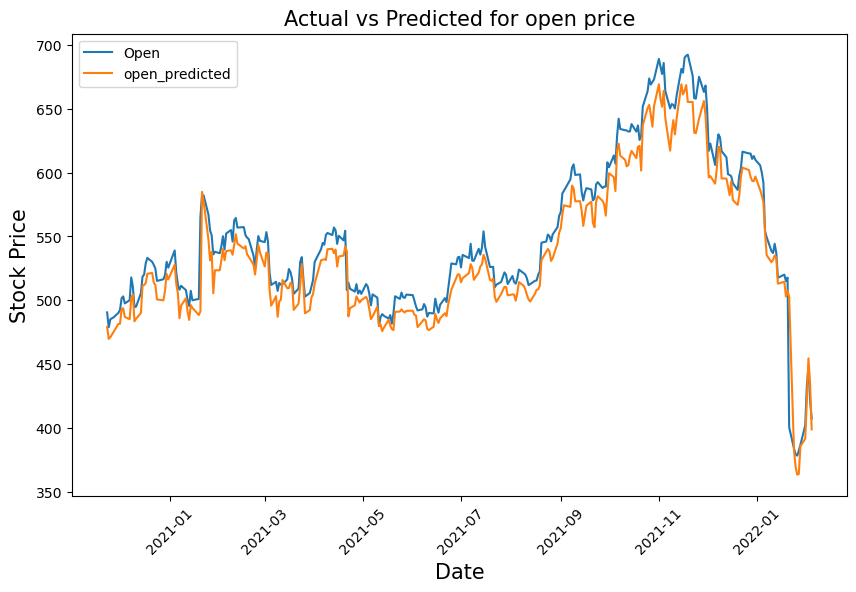

In [94]:
# plotting the actual open and predicted open prices on date index
df_merge[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

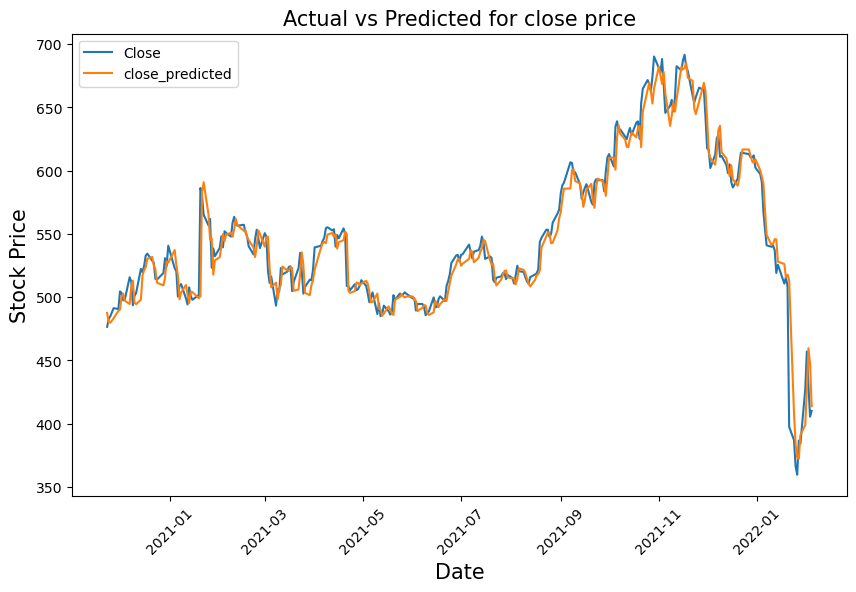

In [95]:
# plotting the actual close and predicted close prices on date index 
df_merge[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()